In [276]:
# Install libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

### EDA for Raw Dataset

In [277]:
# Load the dataset
df = pd.read_csv('../data/reddit_raw.csv')  

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  104 non-null    object
 1   title      104 non-null    object
 2   text       104 non-null    object
 3   url        104 non-null    object
 4   created    104 non-null    object
 5   keyword    104 non-null    object
 6   score      104 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


In [279]:
df.head()

subreddit                                              title  \
0   ukraine                     Volunteering in civilian roles   
1   ukraine                                                 <3   
2   ukraine  The Angry Ukrainian Syndrome: Injustice and St...   
3   ukraine  I wrote this letter to my representatives in c...   
4   ukraine  Looking forward - would love to hear ppl's tho...   

                                                text  \
0  Hi,\n\nI’m an American. When the war broke out...   
1  As a Polish person I just came here to tell yo...   
2  I found this useful for understanding my own b...   
3  **Find your representatives here:** [**https:/...   
4  Sorry for the vague question, but I only have ...   

                                                 url              created  \
0  https://www.reddit.com/r/ukraine/comments/1m3v...  2025-07-19 14:54:55   
1  https://www.reddit.com/r/ukraine/comments/1lxf...  2025-07-11 21:03:10   
2  https://www.reddit.com/r/ukraine/comments/1lio...  2025-06-23 20:38:06   
3  https://www.reddit.com/r/ukraine/comments/1lfq...  2025-06-20 02:45:54   
4  https://www.reddit.com/r/ukraine/comments/1kv8...  2025-05-25 19:56:51   

   keyword  score  
0  refugee     62  
1  refugee    544  
2  refugee    230  
3  refugee    125  
4  refugee     13

In [280]:
df['subreddit'].value_counts()

subreddit
ukraine            50
IsraelPalestine    50
politics            3
geopolitics         1
Name: count, dtype: int64

In [281]:
df.drop(df[df['subreddit'].isin(['politics', 'geopolitics'])].index, inplace =True)

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 103
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  100 non-null    object
 1   title      100 non-null    object
 2   text       100 non-null    object
 3   url        100 non-null    object
 4   created    100 non-null    object
 5   keyword    100 non-null    object
 6   score      100 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 6.2+ KB


In [283]:
# Example for specific subreddit
df[df['subreddit']=='IsraelPalestine'].head()  

subreddit                                              title  \
54  IsraelPalestine  The Pro-Palestine movement is slowly proving i...   
55  IsraelPalestine  At What Point Does Resistance Become Selfishness?   
56  IsraelPalestine  Why do Islamic Totalitarian Theocracies get a ...   
57  IsraelPalestine  Myth: Israel Population Mostly Holocaust Refugees   
58  IsraelPalestine      If the IDF touches Greta thunberg it’s over….   

                                                 text  \
54  **Important to note:**\n\n  \n**I sympathize w...   
55  I was taking a look at some numbers of people ...   
56  Just today Arab and Persian sources report on ...   
57  I find the following numbers factual and persu...   
58  Ya know the other day I was looking into this ...   

                                                  url              created  \
54  https://www.reddit.com/r/IsraelPalestine/comme...  2025-07-24 08:31:16   
55  https://www.reddit.com/r/IsraelPalestine/comme...  2025-07-20 18:22:08   
56  https://www.reddit.com/r/IsraelPalestine/comme...  2025-06-30 00:55:36   
57  https://www.reddit.com/r/IsraelPalestine/comme...  2025-06-18 20:49:56   
58  https://www.reddit.com/r/IsraelPalestine/comme...  2025-06-04 19:13:57   

    keyword  score  
54  migrant     47  
55  migrant      7  
56  migrant     57  
57  migrant     73  
58  migrant     24

In [284]:
# Example for specific subreddit
df[df['subreddit']=='ukraine'].head()  

subreddit                                              title  \
0   ukraine                     Volunteering in civilian roles   
1   ukraine                                                 <3   
2   ukraine  The Angry Ukrainian Syndrome: Injustice and St...   
3   ukraine  I wrote this letter to my representatives in c...   
4   ukraine  Looking forward - would love to hear ppl's tho...   

                                                text  \
0  Hi,\n\nI’m an American. When the war broke out...   
1  As a Polish person I just came here to tell yo...   
2  I found this useful for understanding my own b...   
3  **Find your representatives here:** [**https:/...   
4  Sorry for the vague question, but I only have ...   

                                                 url              created  \
0  https://www.reddit.com/r/ukraine/comments/1m3v...  2025-07-19 14:54:55   
1  https://www.reddit.com/r/ukraine/comments/1lxf...  2025-07-11 21:03:10   
2  https://www.reddit.com/r/ukraine/comments/1lio...  2025-06-23 20:38:06   
3  https://www.reddit.com/r/ukraine/comments/1lfq...  2025-06-20 02:45:54   
4  https://www.reddit.com/r/ukraine/comments/1kv8...  2025-05-25 19:56:51   

   keyword  score  
0  refugee     62  
1  refugee    544  
2  refugee    230  
3  refugee    125  
4  refugee     13

In [285]:
# Check the distribution of scores
df['score'].value_counts() 

score
6      5
14     4
30     4
19     4
8      3
      ..
132    1
202    1
112    1
161    1
23     1
Name: count, Length: 67, dtype: int64

In [286]:
df['keyword'].value_counts()

keyword
refugee                               55
refugees fleeing Russian invasion      9
internal displacement Ukraine          8
migrant                                7
border crossing                        6
eastern Ukraine                        6
immigrantUkrainian refugee             3
migration                              2
refugee in Europe                      2
asylum seeker                          1
Ukrainian war migrantGaza refugees     1
Name: count, dtype: int64

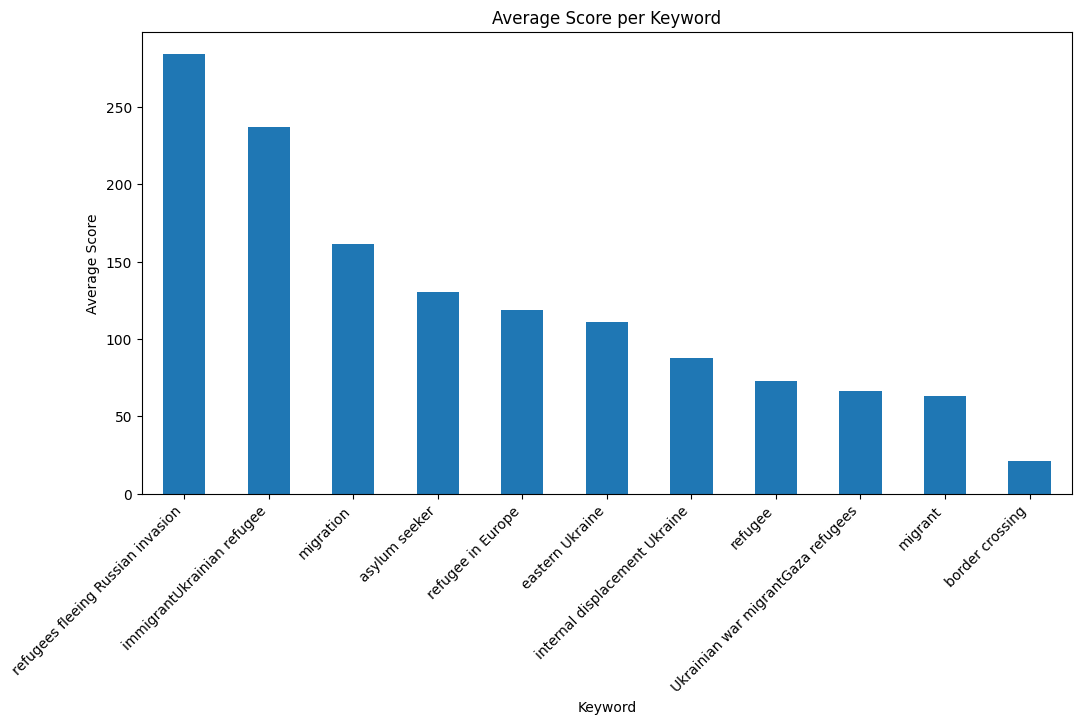

In [287]:
# Q: which keywords are most associated with higher/lower scores?
# compute average score per keyword
avg_scores = df.groupby("keyword")["score"].mean().sort_values(ascending=False)

avg_scores.plot(kind="bar", figsize=(12,6))
plt.title("Average Score per Keyword")
plt.ylabel("Average Score")
plt.xlabel("Keyword")
plt.xticks(rotation=45, ha="right")
plt.show()

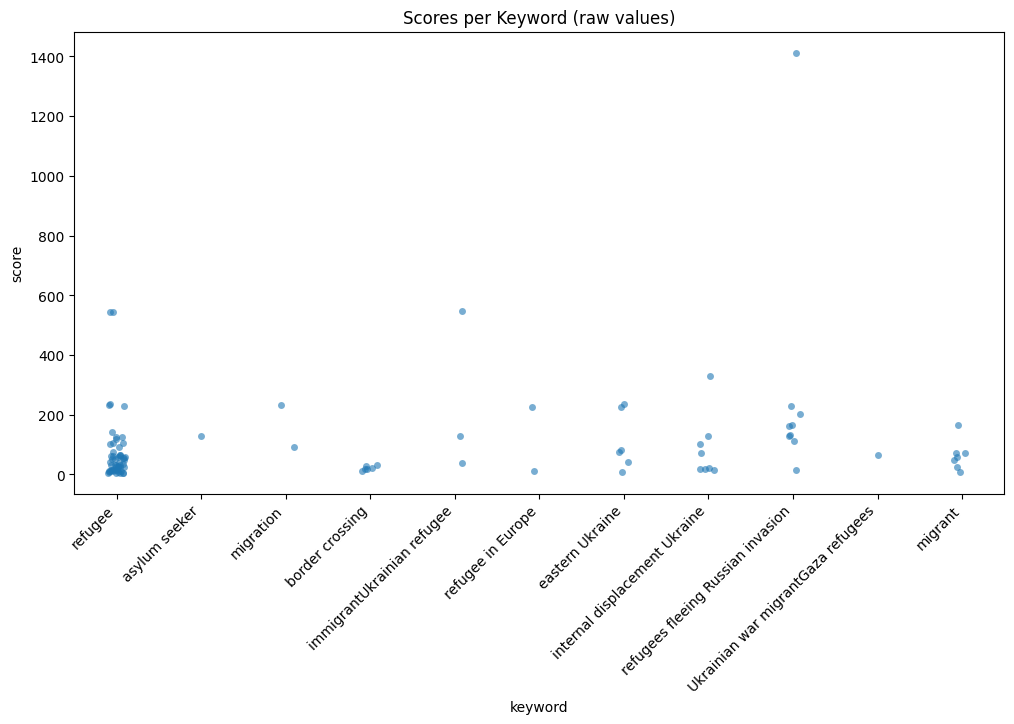

In [288]:
# Scores per keyword (raw values)
plt.figure(figsize=(12,6))
sns.stripplot(x="keyword", y="score", data=df, jitter=True, alpha=0.6)
plt.xticks(rotation=45, ha="right")
plt.title("Scores per Keyword (raw values)")
plt.show()

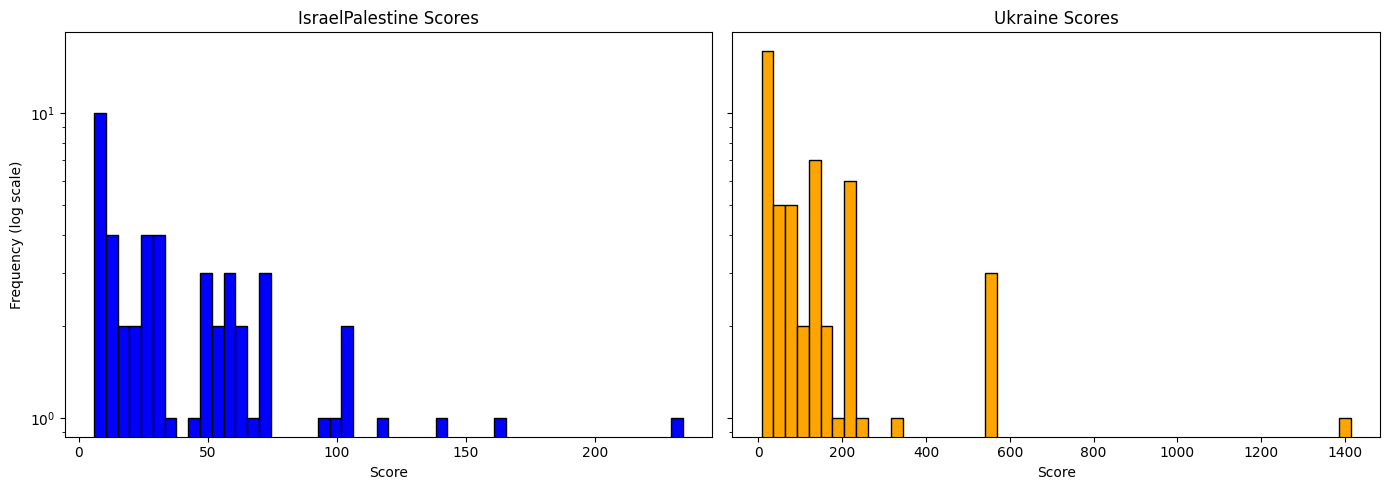

In [289]:
# Plotting the score distribution for two subreddits
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
scores_israel = df[df['subreddit'] == 'IsraelPalestine']['score']
scores_ukraine = df[df['subreddit'] == 'ukraine']['score']
axes[0].hist(scores_israel, bins=50, color='blue', edgecolor='black', log=True)
axes[0].set_title('IsraelPalestine Scores')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Frequency (log scale)')

axes[1].hist(scores_ukraine, bins=50, color='orange', edgecolor='black', log=True)
axes[1].set_title('Ukraine Scores')
axes[1].set_xlabel('Score')

plt.tight_layout()
plt.show()


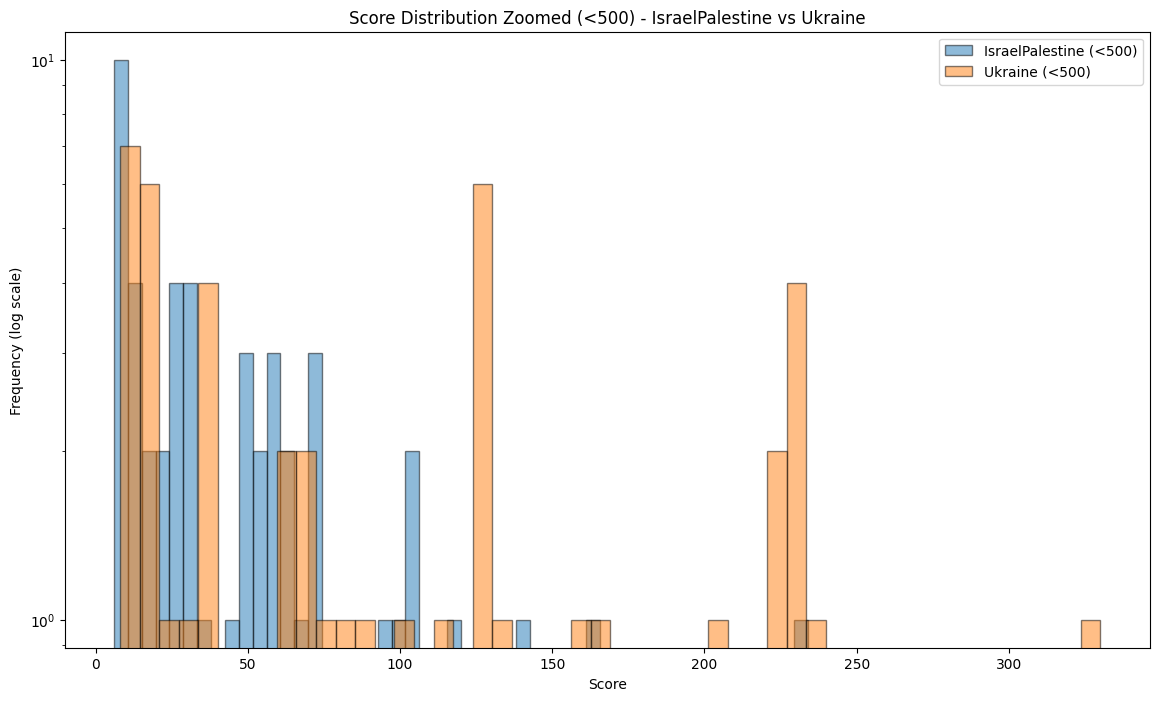

In [290]:
# Plotting the overlapped score distribution for scores less than 500 
plt.figure(figsize=(14, 8))

plt.hist(scores_israel[scores_israel < 500], bins=50, alpha=0.5, label='IsraelPalestine (<500)', edgecolor='black', log=True)
plt.hist(scores_ukraine[scores_ukraine < 500], bins=50, alpha=0.5, label='Ukraine (<500)', edgecolor='black', log=True)

plt.title('Score Distribution Zoomed (<500) - IsraelPalestine vs Ukraine')
plt.xlabel('Score')
plt.ylabel('Frequency (log scale)')
plt.legend()
plt.show()


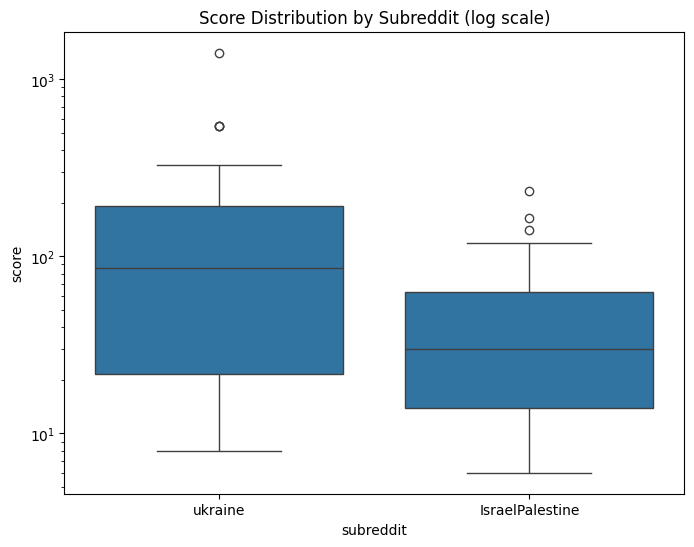

In [291]:
# Boxplot for score distribution by subreddit
plt.figure(figsize=(8, 6))
subset = df[df['subreddit'].isin(['IsraelPalestine', 'ukraine'])]
sns.boxplot(data=subset, x='subreddit', y='score')
plt.yscale('log')
plt.title('Score Distribution by Subreddit (log scale)')
plt.show()


<Figure size 1400x600 with 0 Axes>

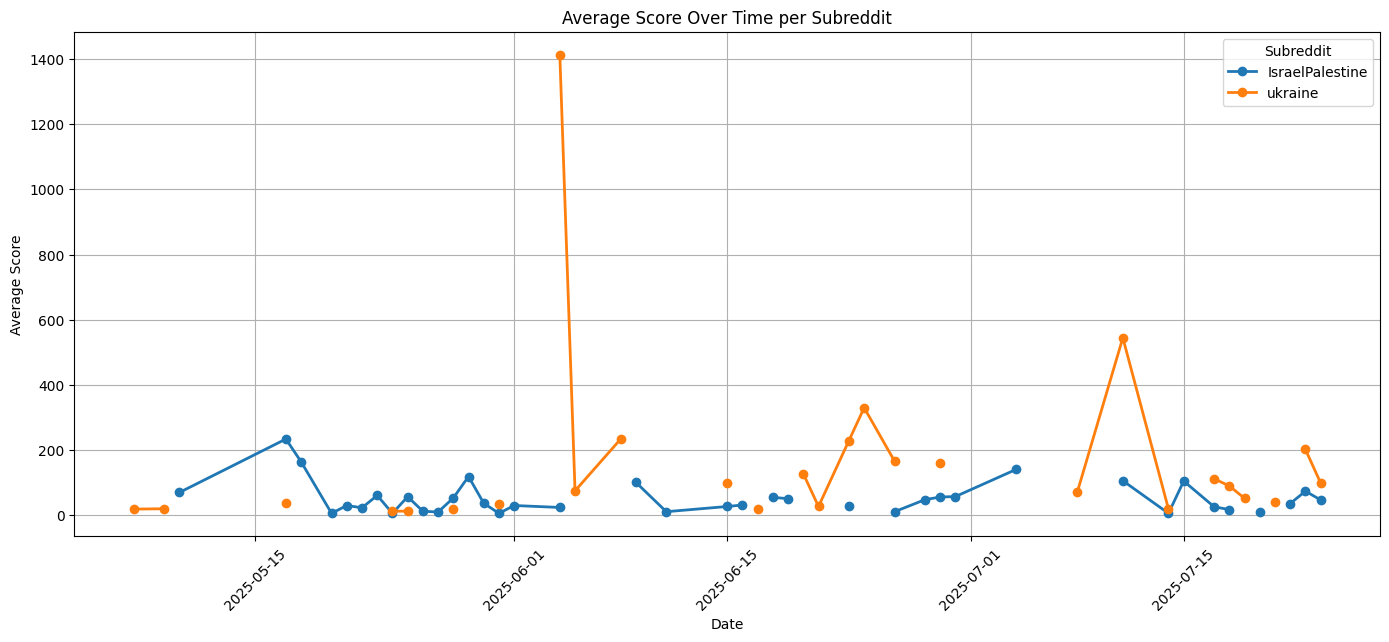

In [292]:
# Q: How did a specific subreddit (e.g., IsraelPalestine) perform in terms of score distribution over time?
# Convert to datetime
df['created_dt'] = pd.to_datetime(df['created'])

# Extract date only (e.g. daily granularity)
df['date'] = df['created_dt'].dt.date

# Group by date and subreddit
score_by_date = df.groupby(['date', 'subreddit'])['score'].mean().reset_index()

# Pivot for plotting
score_pivot = score_by_date.pivot(index='date', columns='subreddit', values='score')

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
score_pivot.plot(kind='line', marker='o', linewidth=2, figsize=(14, 6))

plt.title('Average Score Over Time per Subreddit')
plt.xlabel('Date')
plt.ylabel('Average Score')
plt.grid(True)
plt.legend(title='Subreddit')
plt.tight_layout()
plt.xticks(rotation=45) 
plt.show()

In [293]:
# Q: What's the post with the highest score in the 'ukraine' subreddit?
print(df.loc[df[df['subreddit'] == 'ukraine']['score'].idxmax()])

subreddit                                               ukraine
title                            What’s with the silence, West?
text          We all noticed Trump's clogged pipes after the...
url           https://www.reddit.com/r/ukraine/comments/1l30...
created                                     2025-06-04 10:12:58
keyword                       refugees fleeing Russian invasion
score                                                      1413
created_dt                                  2025-06-04 10:12:58
date                                                 2025-06-04
Name: 47, dtype: object


In [294]:
# Print the text of the post with the highest score in the 'Ukraine' subreddit
df.loc[df[df['subreddit'] == 'ukraine']['score'].idxmax(), 'text']

'We all noticed Trump\'s clogged pipes after the Ukrainian drone attack on Russian air bases and the destruction of nuclear bombers.\n\nAnd why is that? Why are we silent? Although he sang so much before, oh so much.\n\nWe also do not observe any great joy from the European partners. Well, there are a few responses from those who do not decide anything, such as Boris Johnson, but in general there is a deep strategic silence.\n\nIt would seem, why not be happy? You were all so afraid of Russian nuclear weapons - well, we have reduced the number of aircraft that can launch these nuclear weapons by about 41 pieces. Targeting you too btw.\n\nAnd judging by the unidentified explosions in the port of Severomosk, where Russian nuclear submarines are located, the time is not far when these clay legs of the nuclear Colossus will also buckle thanks to Ukrainian ingenuity.\n\nThe question is - why aren\'t you happy that Ukraine found a way to strike at the Russian nuclear greatness that you were 

In [295]:
# Q: What's the post with the highest score in the 'IsraelPalestine' subreddit?
print(df.loc[df[df['subreddit'] == 'IsraelPalestine']['score'].idxmax()])

subreddit                                       IsraelPalestine
title         The Jewish exodus from Arab/Muslim countries i...
text          \n\n\n(To my knowledge, none of the below-stat...
url           https://www.reddit.com/r/IsraelPalestine/comme...
created                                     2025-05-17 18:34:13
keyword                                                 refugee
score                                                       234
created_dt                                  2025-05-17 18:34:13
date                                                 2025-05-17
Name: 103, dtype: object


In [296]:
# Print the text of the post with the highest score in the 'IsraelPalestine' subreddit
df.loc[df[df['subreddit'] == 'IsraelPalestine']['score'].idxmax(), 'text']

"\n\n\n(To my knowledge, none of the below-stated facts are controversial. But I will be happy to be educated).\n\n\n\nA few points of comparison:\n\n\n\n**1.Absolute numbers:**\n\nRoughly 700,000 Palestinians fled or were expelled from Israel during the 1948 war.\n\nRoughly 1,000,000 Jews fled or were expelled from the Arab world plus Iran and Turkey in the decades that followed.\n\nAdditionally, between 30,000 to 90,000 Palestinian refugees managed to return to Israel before it could enforce effective border control. To my knowledge, few or no Jews ever returned to Arab/Muslim countries.\n\n**2. Relative numbers:**\n\nThe Palestinian population in Israel was reduced by around 80% because of the Palestinian Nakba.\n\nThe Jewish population in most Arab/Muslim countries was reduced by 99% or even 100%.\n\nThis is significant because there still exists a vibrant (if oppressed) Palestinian society inside Israel, while the Jewish communities throughout the Arab world (some of them ancient)

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 103
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   subreddit   100 non-null    object        
 1   title       100 non-null    object        
 2   text        100 non-null    object        
 3   url         100 non-null    object        
 4   created     100 non-null    object        
 5   keyword     100 non-null    object        
 6   score       100 non-null    int64         
 7   created_dt  100 non-null    datetime64[ns]
 8   date        100 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 11.9+ KB


In [298]:
df['text'].iloc[0:10]

0    Hi,\n\nI’m an American. When the war broke out...
1    As a Polish person I just came here to tell yo...
2    I found this useful for understanding my own b...
3    **Find your representatives here:** [**https:/...
4    Sorry for the vague question, but I only have ...
5    hello, \nI’m not Ukrainian but my friend is. I...
6    **Find your representatives here:** [**https:/...
7    Hello there! \n\nMy now wife and I moved to Iv...
8    I found this useful for understanding my own b...
9    Hi everyone,\n\nI’m planning a short trip from...
Name: text, dtype: object

In [299]:
# Import sys to add src directory to path
import sys
sys.path.append('../src')
# Import feature engineering functions
from preprocess import clean_text

In [300]:
# Clean the text data
df['text'] = df['text'].apply(clean_text)

In [301]:
# Check the cleaned text
df['text'].iloc[0:10]

0    Hi, I’m an American. When the war broke out, I...
1    As a Polish person I just came here to tell yo...
2    I found this useful for understanding my own b...
3    Find your representatives here: Subject: Urgen...
4    Sorry for the vague question, but I only have ...
5    hello, I’m not Ukrainian but my friend is. I’m...
6    Find your representatives here: Subject: Urgen...
7    Hello there! My now wife and I moved to Ivano-...
8    I found this useful for understanding my own b...
9    Hi everyone, I’m planning a short trip from Ko...
Name: text, dtype: object

In [302]:
# Check for the presence of emoticons in the text and titles
import re

# Regex pattern for common emoticons (you can expand it)
emoticon_pattern = re.compile(
    r'(<3|:\)|:-\)|:\(|:-\(|:D|:-D|:P|;\)|;-\)|XD|:-\||:\|)'
)

def has_emoticon(text):
    return bool(emoticon_pattern.search(text))

def extract_emoticons(text):
    return emoticon_pattern.findall(text)

# Apply to your DataFrame
df['has_emoticon'] = df['title'].apply(has_emoticon)
df['emoticons_found'] = df['title'].apply(extract_emoticons)

# Show titles with emoticons and what was found
print(df.loc[df['has_emoticon'], ['text', 'emoticons_found']])


                                                 text emoticons_found
1   As a Polish person I just came here to tell yo...            [<3]
15  As a Polish person I just came here to tell yo...            [<3]
27  As a Polish person I just came here to tell yo...            [<3]


In [303]:
# Save the cleaned dataset
df.to_csv('../data/reddit_cleaned.csv', index=False)

<3 = ❤️ (love, care, appreciation)
It’s often used informally in Reddit titles or texts to express: 1) solidarity or compassion (e.g., "Support for Ukraine <3"); 2) emotional tone (positive or sentimental); 3) endearment or emotional emphasis

### EDA for ABSA by DeBERTa and Gemini

This method extracted the sentiments towards a certian keyword related to migration, e.g. refugee, but the models were in a strong disagreement due to ambiguity.

Since they weren't truly isolating the sentiment towards the keyword, they were effectively arguing about the overall tone of the post, leading to the low agreement (Cohen's Kappa) and uncorrelated confidence scores (Pearson Correlation) - run `irr_test.py` for the latest scores.

In [304]:
# Load the predicted sentiment dataset
df_predicted = pd.read_csv('../data/reddit_predicted_sentiment.csv')
df_predicted.head(5)

subreddit                                              title  \
0   ukraine                     Volunteering in civilian roles   
1   ukraine                                                 <3   
2   ukraine  The Angry Ukrainian Syndrome: Injustice and St...   
3   ukraine  I wrote this letter to my representatives in c...   
4   ukraine  Looking forward - would love to hear ppl's tho...   

                                                text  \
0  Hi, I’m an American. When the war broke out, I...   
1  As a Polish person I just came here to tell yo...   
2  I found this useful for understanding my own b...   
3  Find your representatives here: Subject: Urgen...   
4  Sorry for the vague question, but I only have ...   

                                                 url              created  \
0  https://www.reddit.com/r/ukraine/comments/1m3v...  2025-07-19 14:54:55   
1  https://www.reddit.com/r/ukraine/comments/1lxf...  2025-07-11 21:03:10   
2  https://www.reddit.com/r/ukraine/comments/1lio...  2025-06-23 20:38:06   
3  https://www.reddit.com/r/ukraine/comments/1lfq...  2025-06-20 02:45:54   
4  https://www.reddit.com/r/ukraine/comments/1kv8...  2025-05-25 19:56:51   

   keyword  score           created_dt        date  has_emoticon  \
0  refugee     62  2025-07-19 14:54:55  2025-07-19         False   
1  refugee    544  2025-07-11 21:03:10  2025-07-11          True   
2  refugee    230  2025-06-23 20:38:06  2025-06-23         False   
3  refugee    125  2025-06-20 02:45:54  2025-06-20         False   
4  refugee     13  2025-05-25 19:56:51  2025-05-25         False   

  emoticons_found gemini_sentiment  gemini_confidence deberta_sentiment  \
0              []          Neutral               0.95          positive   
1          ['<3']         Positive               0.95          negative   
2              []          Neutral               0.65          positive   
3              []         Positive               0.95          positive   
4              []          Neutral               0.75          positive   

   deberta_confidence  
0              0.7304  
1              0.3445  
2              0.3633  
3              0.4363  
4              0.7204

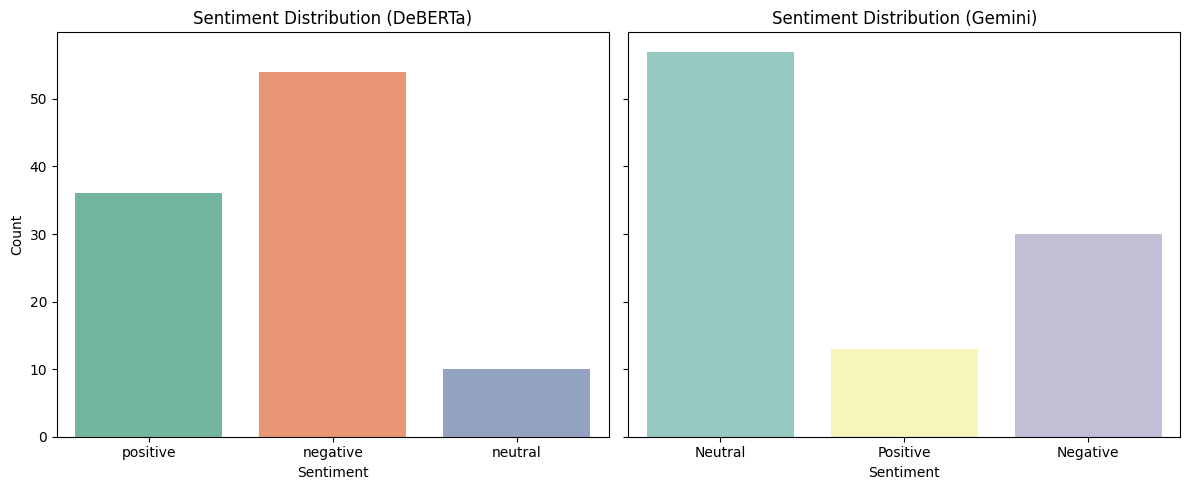

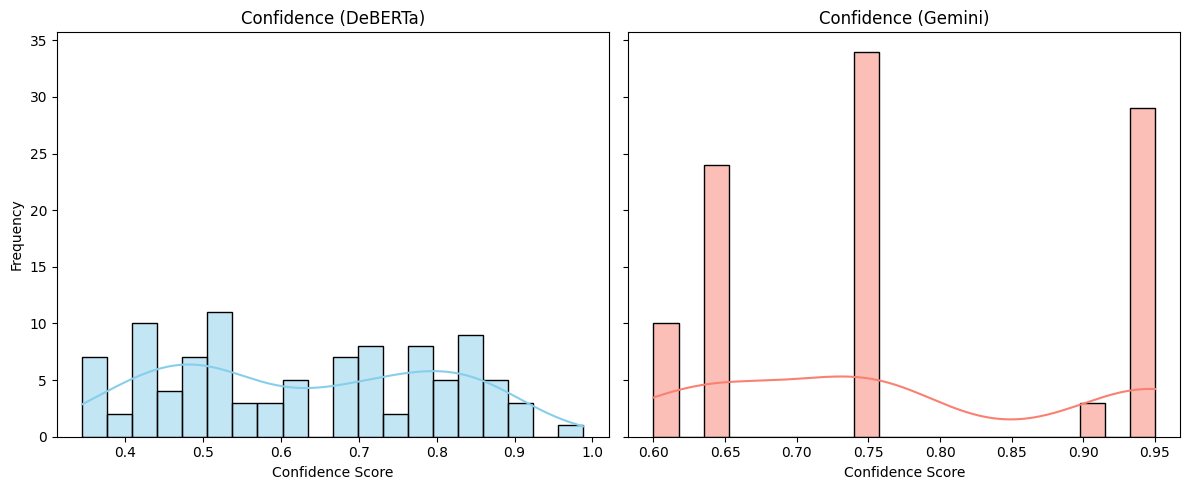

In [305]:
# Sentiment Comparison (categorical)
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(data=df_predicted, x='deberta_sentiment', hue = 'deberta_sentiment', palette='Set2', ax=axes[0])
axes[0].set_title('Sentiment Distribution (DeBERTa)')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Count')

sns.countplot(data=df_predicted, x='gemini_sentiment', hue = 'gemini_sentiment', palette='Set3', ax=axes[1])
axes[1].set_title('Sentiment Distribution (Gemini)')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


# Confidence Comparison (numerical) 
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.histplot(df_predicted['deberta_confidence'], bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Confidence (DeBERTa)')
axes[0].set_xlabel('Confidence Score')
axes[0].set_ylabel('Frequency')

sns.histplot(df_predicted['gemini_confidence'], bins=20, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Confidence (Gemini)')
axes[1].set_xlabel('Confidence Score')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

### EDA for Stance & Intensity Analysis with Gemini

This method extracts multiple targets, stances, and intensity - a true form of Aspect-Based Sentiment Analysis (ABSA). This method explicitly prompts the model to:

- Identify a specific entity (the target).
- Link sentiment-bearing words directly to that entity.
- Determine the stance and its intensity ranking 1-5 based only on those linked words.

In [306]:
# Installand import plotly for interactive visualizations
# pip install plotly
# pip install nbformat
import plotly.express as px 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Import visualisation functions
import importlib
import visualisations
importlib.reload(visualisations)
from visualisations import plot_top_targets_by_subreddit, plot_polarization_by_post_label, plot_stance_wordclouds, plot_weekly_post_counts, plot_stance_trend, plot_weekly_avg_stance_intensity, plot_engagement_distribution, plot_intensity_correlation, plot_target_group_proportions, plot_stance_and_intensity_summary, plot_most_polarized_targets, plot_polarization_heatmap, plot_intensity_vs_engagement, plot_stance_heatmap_by_subreddit
# Import feature engineering functions
from preprocess import group_and_count_targets

In [307]:
# Load the stance dataset
df_stance=pd.read_csv('../data/reddit_stance_analysis_full.csv')
df_stance.head()

subreddit                           title  \
0   ukraine  Volunteering in civilian roles   
1   ukraine  Volunteering in civilian roles   
2   ukraine                              <3   
3   ukraine                              <3   
4   ukraine                              <3   

                                                text  \
0  Hi, I’m an American. When the war broke out, I...   
1  Hi, I’m an American. When the war broke out, I...   
2  As a Polish person I just came here to tell yo...   
3  As a Polish person I just came here to tell yo...   
4  As a Polish person I just came here to tell yo...   

                                                 url              created  \
0  https://www.reddit.com/r/ukraine/comments/1m3v...  2025-07-19 14:54:55   
1  https://www.reddit.com/r/ukraine/comments/1m3v...  2025-07-19 14:54:55   
2  https://www.reddit.com/r/ukraine/comments/1lxf...  2025-07-11 21:03:10   
3  https://www.reddit.com/r/ukraine/comments/1lxf...  2025-07-11 21:03:10   
4  https://www.reddit.com/r/ukraine/comments/1lxf...  2025-07-11 21:03:10   

   keyword  score           created_dt        date  has_emoticon  \
0  refugee     62  2025-07-19 14:54:55  2025-07-19         False   
1  refugee     62  2025-07-19 14:54:55  2025-07-19         False   
2  refugee    544  2025-07-11 21:03:10  2025-07-11          True   
3  refugee    544  2025-07-11 21:03:10  2025-07-11          True   
4  refugee    544  2025-07-11 21:03:10  2025-07-11          True   

  emoticons_found                                           label  \
0              []  Humanitarian concerns and support for refugees   
1              []  Humanitarian concerns and support for refugees   
2          ['<3']         Prejudice, discrimination, and identity   
3          ['<3']         Prejudice, discrimination, and identity   
4          ['<3']         Prejudice, discrimination, and identity   

                                         target      stance  \
0                            Ukrainian refugees  Supportive   
1                                       Ukraine  Supportive   
2                                         Putin    Critical   
3                         refugees from Ukraine  Supportive   
4  Ukrainians, Belarusians and other immigrants  Supportive   

   confidence_intensity  
0                     5  
1                     4  
2                     4  
3                     5  
4                     5

In [308]:
# Check the distribution of targets
df_stance['target'].value_counts()

target
Israel                      31
Ukraine                     25
Hamas                       24
Palestinians                16
Russia                      15
                            ..
Civilians being targeted     1
Palestinian suffering        1
Critics of Israel            1
Media                        1
refugee camps                1
Name: count, Length: 341, dtype: int64

In [309]:
# Check the distribution of stances
df_stance['stance'].value_counts()

stance
Critical      340
Supportive    235
Neutral        50
Name: count, dtype: int64

In [310]:
# Distribution of Targets
# Q: Which migration-related entities (e.g. Ukrainian refugees, asylum seekers, migrants, EU) are most discussed?
plot_top_targets_by_subreddit(df_stance, 'subreddit', 'target', top_n=20)

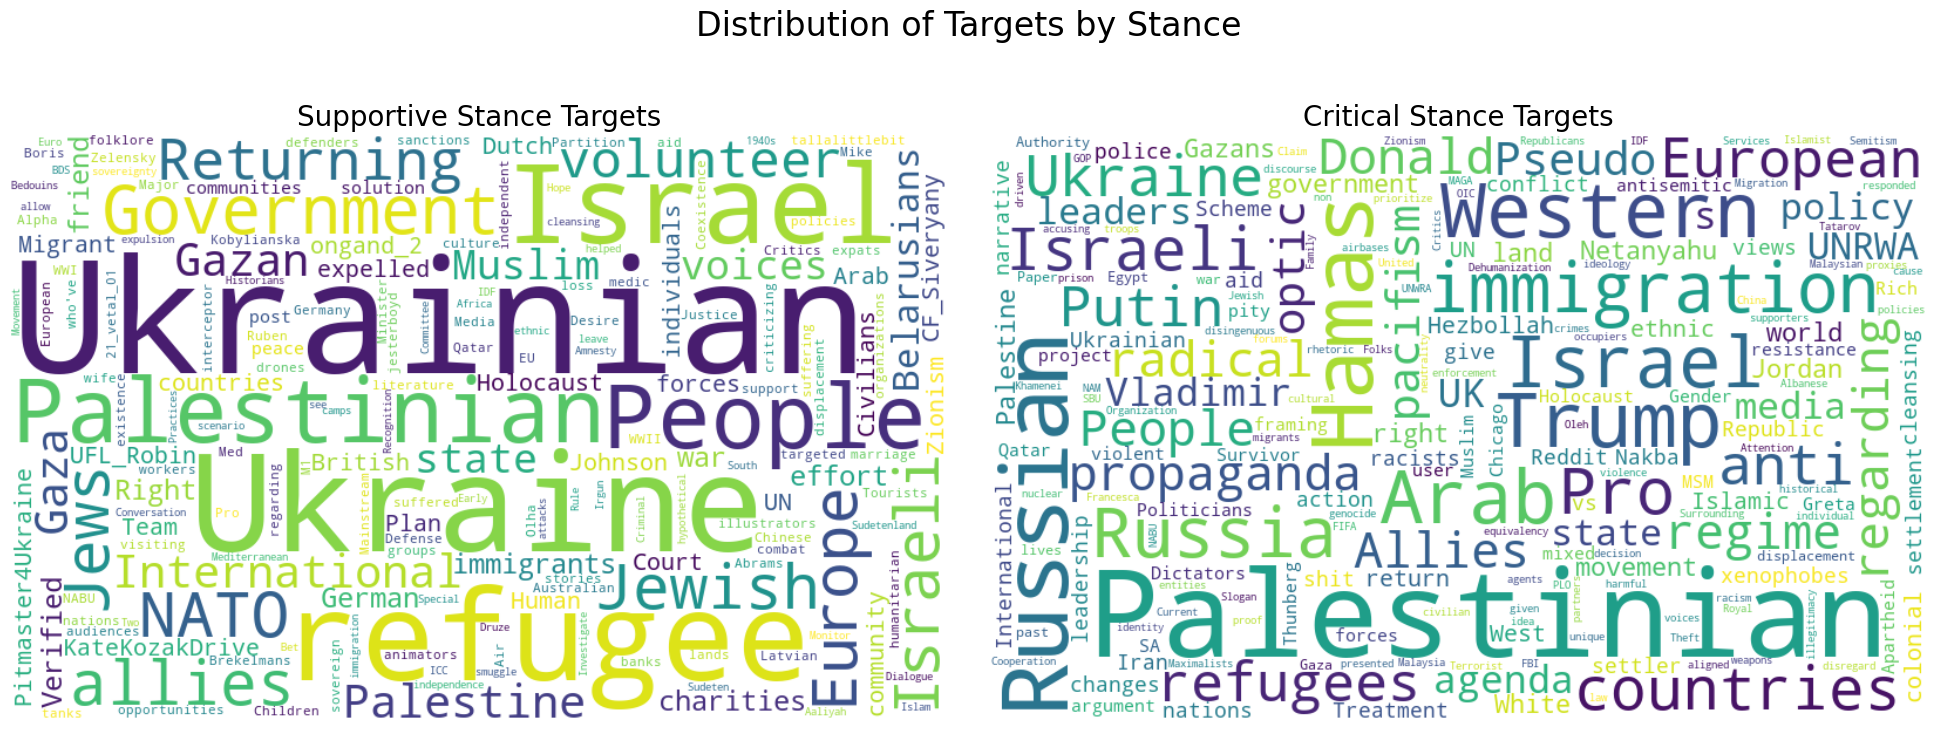

In [311]:
# Distribution of targets by stance
# Q: How do the targets differ between supportive and critical stances?
plot_stance_wordclouds(df_stance, stance_col='stance', target_col='target')

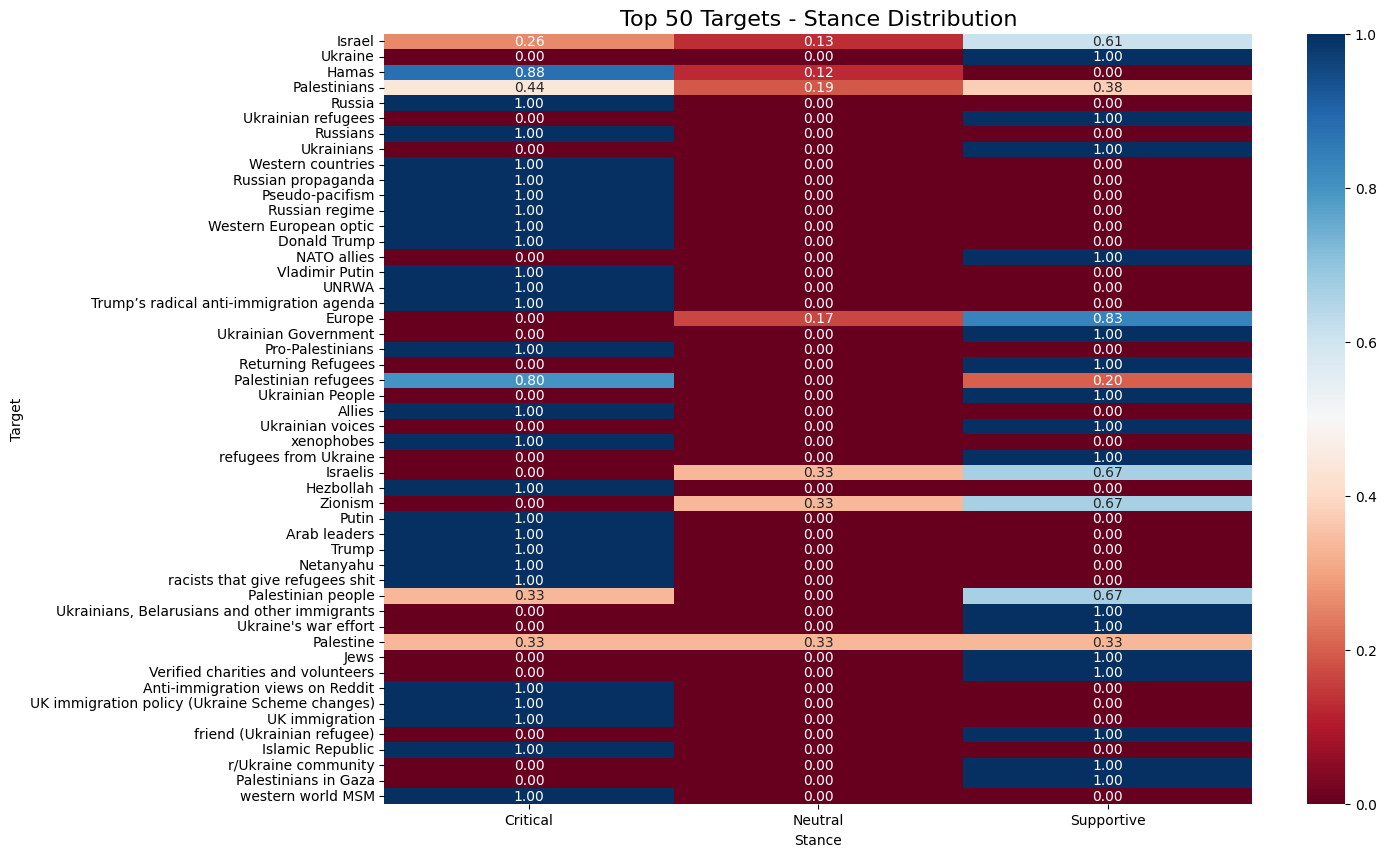

In [312]:
# Target-Stance Heatmap
# Compute proportions per target
heatmap_data = df_stance.groupby(["target","stance"]).size().unstack(fill_value=0)
top_targets = df_stance['target'].value_counts().head(50).index
heatmap_data_top = heatmap_data.loc[top_targets]

plt.figure(figsize=(14,10))  # slightly bigger for readability
sns.heatmap(
    heatmap_data_top.div(heatmap_data_top.sum(axis=1), axis=0),
    annot=True,
    fmt=".2f",
    cmap="RdBu",
    center=0.5
)
plt.title("Top 50 Targets - Stance Distribution", fontsize=16)
plt.ylabel("Target")
plt.xlabel("Stance")
plt.show()


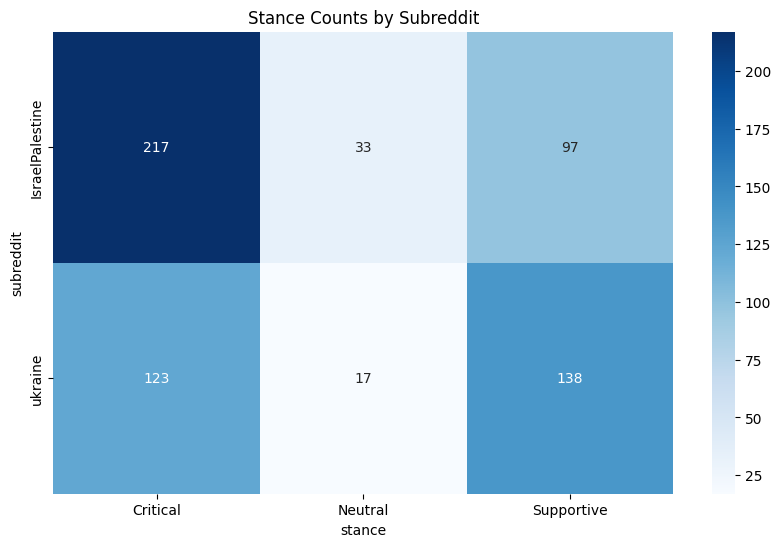

In [313]:
# Subreddit-Stance Heatmap
heatmap_data = df_stance.groupby(["subreddit","stance"]).size().unstack(fill_value=0)

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Blues")
plt.title("Stance Counts by Subreddit", fontsize=12)
plt.show()

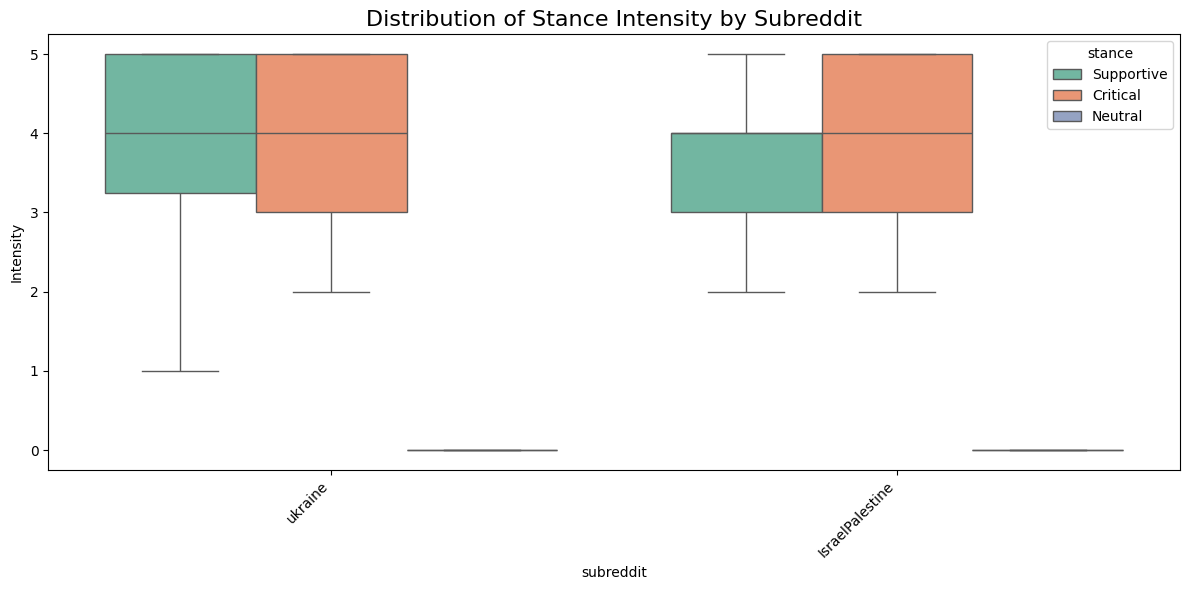

In [314]:
# Q: How strong is the stance in each subreddit?
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df_stance, x="subreddit", y="confidence_intensity", hue="stance", palette="Set2")
plt.title("Distribution of Stance Intensity by Subreddit", fontsize=16)
plt.ylabel("Intensity")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [315]:
# Polarization Index by Subreddit
# Q: To what extent is discourse polarized in each subreddit?
plot_stance_heatmap_by_subreddit(df_stance, subreddit_col='subreddit', stance_col='stance', intensity_col='confidence_intensity')

In [316]:
# Polarization Index by Post Label
# Q: To what extent is discourse polarized in each general post category?
plot_polarization_by_post_label(df_stance, stance_col='stance', intensity_col='confidence_intensity', label_col='label')

In [317]:
# Stance Across Subreddits Over Time
# Q: How have the stances toward migration-related topics evolved in each subreddit over time?
plot_weekly_post_counts (df_stance, date_col='date', subreddit_col='subreddit', stance_col='stance')

In [ ]:
# Trend of Supportive vs Critical Stance Proportion Over Time
# Q: How has the proportion of supportive vs critical posts changed over time in each subreddit?
plot_stance_trend(df_stance, subreddit_col="subreddit", stance_col="stance", target_stances=["Supportive", "Critical"])

In [319]:
#  Weekly Average Stance Intensity
# Q: How has the average intensity of supportive versus critical stances varied in each subreddit on a weekly basis?
plot_weekly_avg_stance_intensity(df_stance, subreddit_col="subreddit", stance_col="stance", intensity_col="confidence_intensity")

In [320]:
# Engagement Score Distribution by Stance and Subreddit
plot_engagement_distribution(df_stance, stance_col='stance', subreddit_col='subreddit', score_col='score', intensity_col='confidence_intensity')

In [321]:
#Correlation of Intensity and Score
plot_intensity_correlation(df_stance, stance_col='stance', subreddit_col='subreddit', score_col='score', intensity_col='confidence_intensity')

#### Stance by Grouped Targets

In [322]:
# Stance by Grouped Targets
df_stance = group_and_count_targets(df_stance)
df_stance.tail(5)

subreddit                                              title  \
620  IsraelPalestine  They Send Missiles to Israel, and Shrouds to G...   
621  IsraelPalestine  They Send Missiles to Israel, and Shrouds to G...   
622  IsraelPalestine  They Send Missiles to Israel, and Shrouds to G...   
623  IsraelPalestine  They Send Missiles to Israel, and Shrouds to G...   
624  IsraelPalestine  They Send Missiles to Israel, and Shrouds to G...   

                                                  text  \
620  In this upside down world, where your humanity...   
621  In this upside down world, where your humanity...   
622  In this upside down world, where your humanity...   
623  In this upside down world, where your humanity...   
624  In this upside down world, where your humanity...   

                                                   url              created  \
620  https://www.reddit.com/r/IsraelPalestine/comme...  2025-05-20 15:17:15   
621  https://www.reddit.com/r/IsraelPalestine/comme...  2025-05-20 15:17:15   
622  https://www.reddit.com/r/IsraelPalestine/comme...  2025-05-20 15:17:15   
623  https://www.reddit.com/r/IsraelPalestine/comme...  2025-05-20 15:17:15   
624  https://www.reddit.com/r/IsraelPalestine/comme...  2025-05-20 15:17:15   

     keyword  score           created_dt       date  has_emoticon  \
620  refugee      6  2025-05-20 15:17:15 2025-05-20         False   
621  refugee      6  2025-05-20 15:17:15 2025-05-20         False   
622  refugee      6  2025-05-20 15:17:15 2025-05-20         False   
623  refugee      6  2025-05-20 15:17:15 2025-05-20         False   
624  refugee      6  2025-05-20 15:17:15 2025-05-20         False   

    emoticons_found                                           label  \
620              []  Humanitarian concerns and support for refugees   
621              []  Humanitarian concerns and support for refugees   
622              []  Humanitarian concerns and support for refugees   
623              []  Humanitarian concerns and support for refugees   
624              []  Humanitarian concerns and support for refugees   

                         target      stance  confidence_intensity       week  \
620                    the West    Critical                     4 2025-05-19   
621                      Israel    Critical                     5 2025-05-19   
622                   the world    Critical                     5 2025-05-19   
623  humanitarian aid (shrouds)    Critical                     5 2025-05-19   
624               refugee camps  Supportive                     3 2025-05-19   

                       target_label  target_label_count  
620            Geographic Locations                 158  
621            Geographic Locations                 158  
622           General Public Groups                  67  
623  Abstract Concepts & Ideologies                  44  
624           General Public Groups                  67

In [323]:
# Check the distribution of grouped targets
df_stance['target_label'].value_counts()

target_label
Geographic Locations              158
National/Ethnic Groups             85
State & Non-State Actors           72
General Public Groups              67
Other/Specific                     57
Political Leaders                  53
Institutions & Policies            45
Abstract Concepts & Ideologies     44
Military & Conflict-Related        16
Media & Online Platforms           16
Historical Events & Documents      12
Name: count, dtype: int64

In [324]:
# Proportion of Target Group Mentions
# Q: What is the proportional breakdown of mentions for each migration-related target group?
plot_target_group_proportions(df_stance, target_label_col='target_label')

In [325]:
# Stance & Intensity Across Target Groups and Subreddits
# Q: How do the stances and intensity levels for the target groups compare between the two subreddits?
fig = plot_stance_and_intensity_summary(df_stance, category_col='target_label', top_n=11)  
fig.show()

# Save a high-quality static version
fig.write_image("../graphs/stance_intensity_summary.png", scale=5)

In [326]:
# Most Polarized Targets Across Subreddits with a min_number of mentions filter (5)
plot_most_polarized_targets(df_stance, subreddit_col='subreddit', target_col='target', stance_col='stance')

In [327]:
# Visualise the stance distribution by target group
# Q: How does the proportion of supportive versus critical stances vary in each target group?
plot_polarization_heatmap(df_stance, category_col='target_label', title="Stance Intensity Distribution by Target Group")

In [328]:
# Intensity distribution for top target groups and their engagement on Reddit
# Q: Intensity for Top Target Groups and Their Engagement on Reddit
plot_intensity_vs_engagement(df_stance, top_n=11, min_mentions=15)

In [329]:
df_stance.to_csv('../data/reddit_stance_analysis_full_with_groups.csv', index=False)